# Contour Tracing

Grace Zhang

# Outline

- Introduction
- Snakes
- Intelligent Scissors
- Level Set Methods
- Recent Example

# Definitions

Contours: continuous lines or edges along a boundary that define the shape of an object

Active Contours: Computer-generated curves that move within images to find object boundaries

# Active Contour Model

Given: Initial contour around object

Task: Evolve contour to the object boundary

<br>

<center><img src="figs/active_contour_ex.gif" width=450px alt="default"/></center>

<!-- <center>
    <table><tr>
        <td width=300px><img src="figs/contour_ex.jpeg" width=200px alt="default"/>
        <td width=300px><img src="figs/active_contour_ex.gif" width=200px alt="default"/>
    </tr></table>
</center> -->

# Types of Active Contour Models

- Snakes 
- Intelligent Scissors
- Level Set Methods

# Application: Object Tracking

<br>

<center><img src="figs/object_tracking.jpeg" alt="default"/></center>

# Application: Medical Analysis

<br>

<center><img src="figs/medical_analysis.jpeg" width=500px alt="default"/></center>

# Snakes

Energy-minimizing, two-dimensional spline curve that evolves(moves) towards image features such as strong edges

> Spline: a piecewise polynomial function that can provide a smooth approximation or interpolation to a set of data points

$\rightarrow$ Think of the curve as an elastic band

<center><img src="figs/snake_elastic_band.jpeg" width=400px alt="default"/></center>

## Snakes: Contour Representation

Defined by a set of 2D points that are connected with each other <br>
$\rightarrow$ Initially straight and equal distances between points <br>
$\rightarrow$ Serve as control points of the splines, which allows the contour to transform into deformable shapes <br>
$\rightarrow$ This is an explicit, parametric representation

<br>
<center>$\large \mathbf{v} = \{v_i = (x_i, y_i) \mid i = 0,1,2,\ldots,n-1\}$</center>

<center><img src="figs/snake_representation.jpeg" width=550px alt="default"/></center>

## Snakes: Main Idea

An optimization problem: minimizing the cost function

1. Initialze boundary(contour) curve
2. Minimize cost function by moving the control points and adjusting the splines
3. Continue to minimize if control points have changed locations
4. Stop otherwise

## Snakes: Initialization

- Initial curve is usually around and outside the target object
    - Allows the curve to shrink to the desired contour
- Can also be defined inside object
    - Contour curve would balloon/expand instead
    - More prone to errors because there would be large gaps between control points

<center><img src="figs/snake_initialization.jpeg" width=700px alt="default"/></center>

## Snakes: Energy Function

The cost function that snakes uses is referred to as the energy function

<br>
<center>$\large E_{\text{total}} = E_{\text{internal}} + E_{\text{external}}$</center>

- External Energy(Image Energy): measures how well the curve matches the image data
- Internal Energy(Shape/Bending Energy): reduces extreme curvature and prevents outlier points

## Snakes: External Energy

<br><center>$\large E_{\text{external}}(v(s)) = \gamma \left( I(v(s)) \right)$</center>

- Attracts contour curve toward different image features such as edges, lines, gradients, etc.
- Or can think of it as gravitational pull towards areas of high contrast

$\rightarrow$ $\gamma$ mainly depends on the sign of the value and indicates how the contour curves attract to image features 


<center><img src="figs/snake_external.jpeg" width=400px alt="default"/></center>

## Snakes: Common Types of External Energy

Edge Energy: $E_{\text{edge}}(v(s)) = -\left\lVert \nabla I(v(s))\right\rVert$

$\rightarrow$ If $\gamma$ is negative, contour repels against the edges <br>
$\rightarrow$ Notice the negative sign - high gradient magnitude values are converted to low energy values, thus minimizing the overal energy

Line Energy: $E_{\text{line}}(v(s)) = I(v(s))$

$\rightarrow$ If $\gamma$ is negative, contour would be more attracted to dark regions

## Snakes: Internal Energy

<br><center>$\large E_{\text{internal}} = \alpha E_{\text{elastic}} + \beta E_{\text{smoothness}}$</center>

- Elasticity/Tension: Takes care of rapid changes(want points to move at same pace, this makes the curve contract)
    - Minimizes how far apart the control points are
- Smoothness/Curvature: Takes care of shape, avoids spikes
    - Minimizes how much the curve bends
    
$\rightarrow$ $\alpha$ and $\beta$ are scale factors that control the strength of the elasticity and smoothness of the contour, respectively
<br>$\rightarrow$ Usually $\alpha < \beta$

## Snakes: Internal Energy

Let $\mathbf{v}$ be a controlling point on the contour curve: $\mathbf{v}(s) = (x(s),y(s))$

$E_{\text{elastic}} = \left\lVert \dfrac{d\mathbf{v}}{ds} \right\rVert^2$
- Minimizes the first derivative(rate of change in control points)

$E_{\text{smoothness}} = \left\lVert \dfrac{d^2\mathbf{v}}{ds^2} \right\rVert^2$
- Minimizes the second derivative(rate of change in the curvature of control points)

## Snakes: Limitations

1. Requires a good initialization of the contour manually
2. Cannot follow topological changes of objects

<center><img src="figs/snake_topology.jpeg" width=500px alt="default"/></center>

3. May over-smooth boundaries

<center><img src="figs/snake_smoothness.jpeg" width=150px alt="default"/></center>

4. Difficult to tune the parameters

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage.segmentation import active_contour

img = plt.imread('inputs/brain.png')

In [ ]:
# Initialize the vicinity of the object - a set of 2D points
s = np.linspace(0, 2 * np.pi, 500)
r = 290 + 50 * np.sin(s)
c = 265 + 50 * np.cos(s)
init = np.array([r, c]).T

In [ ]:
# Pass initial contour into the active contour model defined by scikit-image library
snake = active_contour(
    gaussian(img, sigma=0.2, preserve_range=False), # Input blurred image
    init,                                           # Initial set of snake coordinates
    alpha=0.41,                                     # Snake length shape
    beta=7.5,                                       # Snake smoothness shape 
    gamma=0.033,                                    # How aggressively the contour evolves
)

In [ ]:
# Draw the inital contour and the output snake contour on image
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

# Intelligent Scissors

Also known as Live Wires

An interactive method which allows users to sketch in real time a curve that clings to desired object's boundaries

$\rightarrow$ Optimize the contour in real time as the user is drawing

<center><img src="figs/livewire_ex.jpeg" width=400px alt="default"/></center>

## Intelligent Scissors: Main Idea

1. Place an initial seed point on image
2. User moves cursor along object boundary, and an optimal path from the seed point to the cursor(free point) that defines the edges of the contour is computed based on image features. This would generate a live wire that snaps/wraps to the object's borders
3. Place more seed points for refining the path or change direction of the edges, the optimal path would then be dynamically updated
4. Select the initial seed point again to finish tracing the object contour

>Seed point: Manually selected pixel or position on the image that serves as references
><br>Free point: Cursor position on the image

## Intelligent Scissors: Main Idea

<center><img src="figs/livewire_mainidea.jpeg" alt="default"/></center>

## Intelligent Scissors: Greedy Algorithm

Finding the optimal path between seed points and free points: 2D graph search problem

$\rightarrow$ Utilize Dijkstra's shortest path algorithm

$\rightarrow$ Computes the minimum cost path to find the nearby high gradient image features

<center><img src="figs/livewire_dijkstra.jpeg" alt="default"/></center>

## Intelligent Scissors: Converting Image to Graph

<center><img src="figs/livewire_graphstructure.jpeg" alt="default"/></center>

## Intelligent Scissors: Converting Image to Graph

Nodes/Verticies: Correspond to input image's pixel locations, but with values derived from image's features
<br>$\rightarrow$ Purpose is to allow strong edge features to have low costs when computing for minimum cost path
<br>$\rightarrow$ Most common way would be applying a Sobel filter to extract the edges
<br>$\rightarrow$ Can scale it with gradient magnitude such that higher gradients yield lower costs

<center>$f_G = \dfrac{\max(G) - G}{\max(G)} = 1 - \dfrac{G}{\max(G)}$</center>

<center><img src="figs/livewire_nodes.jpeg" width=700px alt="default"/></center>

## Intelligent Scissors: Converting Image to Graph

Edges: Cost of the path between the nodes that are computed from pixel-wise or gradient-based information scaled with Euclidean distance
<br>$\rightarrow$ Generated between each pixel and its neighboring pixels, could be just the horizontal and verticals or a combination with its diagonals

<center><img src="figs/livewire_edges.jpeg" width=700px alt="default"/></center>

## Intelligent Scissors: Pseudocode

1. Initialize node costs to $\infty$, set $p$ to be the seed point, $cost(p) = 0$
2. Expand $p$ as follows:
    <br>$\rightarrow$ For each of $p$'s neighbors $q$ that are not expanded:
        <br>&emsp;&emsp;$\rightarrow$ Set $cost(q) = min(cost(p) + cost_{pq}, cost(q))$
        <br>&emsp;&emsp;$\rightarrow$ If $q$'s cost changed, make $q$ point back to $p$
        <br>&emsp;&emsp;$\rightarrow$ Insert $q$ on the visited list (if not already there)
3. Set $r$ = node with minimum cost on the visited list
4. Repeat step 2 for $p = r$

<center><img src="figs/livewire_algo.jpeg" alt="default"/></center>

## Intelligent Scissors: Minimum Cost Path

<center><img src="figs/livewire_minpath.jpeg" width=900px alt="default"/></center>

In [1]:
import heapq
from math import log
from math import fabs
import matplotlib.pyplot as plt
from skimage import color
from skimage import filters
from itertools import cycle
import numpy as np

%matplotlib notebook

img_orig = plt.imread("inputs/ditto.jpeg")
img = color.rgb2gray(img_orig)

In [2]:
def generate_img_graph(img):
    """
    Generate a graph from an image where each pixel is a node and edges connect to neighboring pixels.
    
    Args:
        img (numpy.ndarray): The input image in grayscale format.
    """
    
    # Apply Sobel filter to find the horizontal&vertical gradients in the image
    edges = filters.sobel(img)
    
    graph = {}
    rows, cols = edges.shape
    
     # Iterate through each pixel in the image and consider each as a node/vertex
    for col in range(cols):
        for row in range(rows):

            neighbors = [] # Throw horizontal&vertical neighbors' indicies in list
            if row > 0: neighbors.append( (row-1, col) )
            if row < rows-1: neighbors.append( (row+1, col) )
            if col > 0: neighbors.append( (row, col-1) )
            if col < cols-1: neighbors.append( (row, col+1) )

            cost = {} # Calculate pixel-wise distance/cost based on gradients
            for n in neighbors: cost[n] = fabs(edges[row, col] - edges[n[0], n[1]])

            graph[(row,col)] = cost # Store the neighboring paths' costs in graph
    
    return graph

In [3]:
def flatten(L):
    """
    Flatten a nested list structure [0,[1,[2,[]]]]
    
    Args:
        L: linked list
    """
    while len(L) > 0:
        yield L[0]
        L = L[1]

def dijkstra_algo(graph, start, end, len_penalty):
    """
    Dijkstra's algorithm which find the shortest path in a graph

    Args:
        graph: The graph in which to find the shortest path
        start: Starting node (vertex) of the path
        end: Ending node (vertex) of the path
        len_penalty: Penalty to add for each step based on the number of visited nodes
            - Higher value penalizes larger number of visited nodes more
    """
    q = [(0, start, ())]  # Priority queue  (cost, path_head, path_rest)
    visited = set()       # Visited nodes/vertices
    while True:
        (cost, v1, path) = heapq.heappop(q)  # Pop the node with the smallest cost
        if v1 not in visited:
            visited.add(v1)  # Mark this node as visited
            
            if v1 == end: return list(flatten(path))[::-1] + [v1] 
            
            path = (v1, path)   # Append node to the path
            
            # Iterate through adjacent vertices and add them to the queue with updated costs
            for (v2, cost2) in graph[v1].items():
                if v2 not in visited:
                    heapq.heappush(q, (cost + cost2 + len_penalty*log(len(visited)), v2, path))

In [4]:
# Initialize paths and generate graph from image

start_point, current_path= None, None
len_penalty = 10.0

img_graph = generate_img_graph(img)

In [5]:
# Interactive Live Wire helper event functions

def mouse_clicked(event):
    global start_point
    if not start_point: start_point = (int(event.ydata), int(event.xdata))
        
    else:
        end_point = (int(event.ydata), int(event.xdata))
        path = dijkstra_algo(img_graph, start_point, end_point, len_penalty)
        plt.plot(np.array(path)[:,1], np.array(path)[:,0], c='r')
        start_point = end_point

def mouse_moved(event):
    if not start_point: return
    
    end_point = (int(event.ydata), int(event.xdata))
    path = dijkstra_algo(img_graph, start_point, end_point, len_penalty)
    
    global current_path
    if current_path: current_path.pop(0).remove()
    current_path = plt.plot(np.array(path)[:,1], np.array(path)[:,0], c='r')

def key_pressed(event):
    if event.key == 'escape':
        global start_point, current_path
        start_point, current_path = None, None

<IPython.core.display.Javascript object>


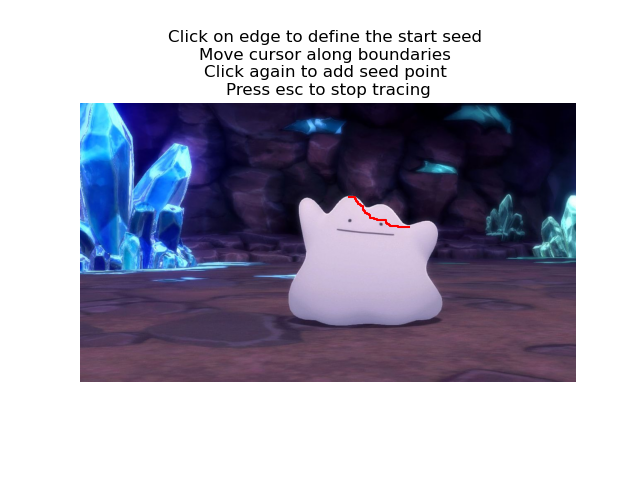

In [7]:
# Enable interactive live wire tool in figure

plt.connect('button_release_event', mouse_clicked)
plt.connect('motion_notify_event', mouse_moved)
plt.connect('key_press_event', key_pressed)

plt.imshow(img_orig)
plt.title("Click on edge to define the start seed \nMove cursor along boundaries \nClick again to add seed point \nPress esc to stop tracing")
plt.axis('off')
plt.show()

## Level Sets Method: Main Idea

- There is a 3D surface that intersects with a 2D plane, and this intersection is the contour
- This surface is evolved over time based on a force function to eventually bound desired object

<center><img src="figs/levelset_basic.jpeg" width=800px alt="default"/></center>

## Level Sets Method: Contour Representation

Let $(x,y)$ be a point on the curve and $t$ is the time or number of iterations

$\rightarrow$ 3D surface = level set, represented as an evolving/embedding function $\phi(x,y,t)$
<br>$\rightarrow$ 2D plane = zero-crossing of the level set, where $\phi(x,y,t)=0$ 
<br>$\rightarrow$ Contour = intersection curve of the zero-crossing is $\{(x,y)|\phi(x,y,t)=0\}$ 
<br>$\rightarrow$ This is an implicit representatioin(a function rather than set of points)

<br><center><img src="figs/levelset_illustration.jpeg" width=800px alt="default"/></center>

## Level Sets Method: Initialization

Similar to snakes, also requires to define an initial contour $\phi(x,y,t=0)$
<br>$\rightarrow$ Usually a signed distance function(SDF)

<center>$\phi(x,y,t=0) =
\begin{cases}
SDF(x, y) & \text{if } (x, y) \text{ is outside the contour} \\
-SDF(x, y) & \text{if } (x, y) \text{ is inside the contour}
\end{cases}$</center>

<br><center><img src="figs/levelset_sdf.jpeg" width=500px alt="default"/></center>

## Level Sets Method: How to Evolve?

Let $x(t)$ be the position on the contour over time such that $\phi(x(t),t)=0$ gives the contour at a given $t$

1. Differentiate $\phi(x(t),t)=0$ 
<br>$\rightarrow$ $\dfrac{d\phi(x(t),t)}{dt} = 0$
2. Apply chain rule 
<br>$\rightarrow$ $\dfrac{d\phi}{dx(t)}\dfrac{dx(t)}{dt}+\dfrac{d\phi}{dt}= 0$ $\leftrightarrow$ $\nabla\phi \cdot x_{t}+\phi_{t}= 0$ (in different notation)

## Level Sets Method: How to Evolve?
$\nabla\phi \cdot x_{t}+\phi_{t}= 0$

$x_{t}$ is the speed that the contour moves, which is always along the normal to the surface or contour, therefore it can be defined by a force function $F$ along the normal: 

$$x_{t} = F\hat{n}, \hat{n} = \dfrac{\nabla\phi}{\left\lVert \nabla\phi \right\rVert}$$

<center><img src="figs/levelset_normal.jpeg" width=500px alt="default"/></center>

## Level Sets Method: How to Evolve?

3. Plug in the speed function
$\nabla\phi \cdot F \cdot \hat{n}+\phi_{t}= 0$ $\rightarrow$ $\boxed{F \cdot \left\lVert \nabla\phi \right\rVert+\phi_{t}= 0}$

This defines the evolution equation of $\phi$ and $F$ describes the motion of the points on the curve

$\rightarrow$ With this equation, the evolving function can be derived after each iteration of updating the contour

## Level Sets Method: Deriving the Evolving Function

With the evolution equation $F \cdot \left\lVert \nabla\phi \right\rVert+\phi_{t}= 0$, the level set at a certain time $t$ can be evaluated through partial differentials

Given the derivative of a function:
$f'(x) = \dfrac{f(x + \Delta x) - f(x)}{\Delta x}$

Plug in the evolving function:
$\dfrac{\partial \phi(x(t), t)}{\partial t} = \dfrac{\phi(x(t), t + \Delta t) - \phi(x(t), t)}{\Delta t}$

$\rightarrow$ $\Delta t \phi_t = \phi(x(t), t + \Delta t) - \phi(x(t), t)$

$\rightarrow$ $\phi(x(t), t + \Delta t) = \phi(x(t), t) - \Delta t \phi_t$

Now plugging in the evolution equation:

$$\boxed{\phi(x(t), t + \Delta t) = \phi(x(t), t) + \Delta t F \|\nabla \phi\|}$$




## Level Sets Method: Force Function

The force function defines a force that drives curve propagation
<br>$\rightarrow$ This relies on the curvature $\kappa$

Here are some common types:

<br>$\rightarrow$ Image gradient based
$\kappa = \dfrac{1}{1 + \left\lVert \nabla I\right\rVert^2}$

<br>$\rightarrow$ Gradients of the normals
$\kappa = \nabla \cdot \dfrac{\nabla \phi}{\left\lVert \nabla\phi \right\rVert} = \dfrac{\phi_{xx} \phi_y^2 - 2 \phi_{xy} \phi_x \phi_y + \phi_{yy} \phi_x^2}{(\phi_x^2 + \phi_y^2)^{3/2}}$

## Level Sets Method: Force Function

Ex. Let $F=1$ inside the form, and $F=-1$ outside the form

$\rightarrow$ Contour would be attracted to the form based on the given force function

<center><img src="figs/levelsets_forcefn.jpeg" width=800px alt="default"/></center>

In [8]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import io
import warnings
from scipy.ndimage import gaussian_filter
warnings.filterwarnings('ignore')

img = io.imread('inputs/twoObj.bmp')

# Smooth image to reduce noise
img_smooth = gaussian_filter(img, 2.0)

In [9]:
def init_phi(img):
    """
    Initialize the evolving function or level curve from image
    defined by a signed distance function

    Args:
        img: Input image
    """
    phi = np.ones(img.shape[:2])
    phi[5:-5, 5:-5] = -1
    return phi

def gradient_magnitude(phi):
    """
    Calculate the gradient magnitude

    Args:
        phi: The evolving function or level curve
    """
    gradient_field = np.array(np.gradient(phi))
    return np.sqrt(np.sum(np.square(gradient_field), axis=0))

def force_function(img):
    """
    Define the force function as an edge detector

    Args:
        img: Input image
    """
    return 1/(1 + gradient_magnitude(img)**2)

In [10]:
# Set up parameters
num_iterations = 100    # Number of iterations for the level set evolution
num_plots = 10          # Number of plots
dt = 1                  # Time step of the iteration
display_interval = 10   # Intervals for displaying the updated contour

<IPython.core.display.Javascript object>


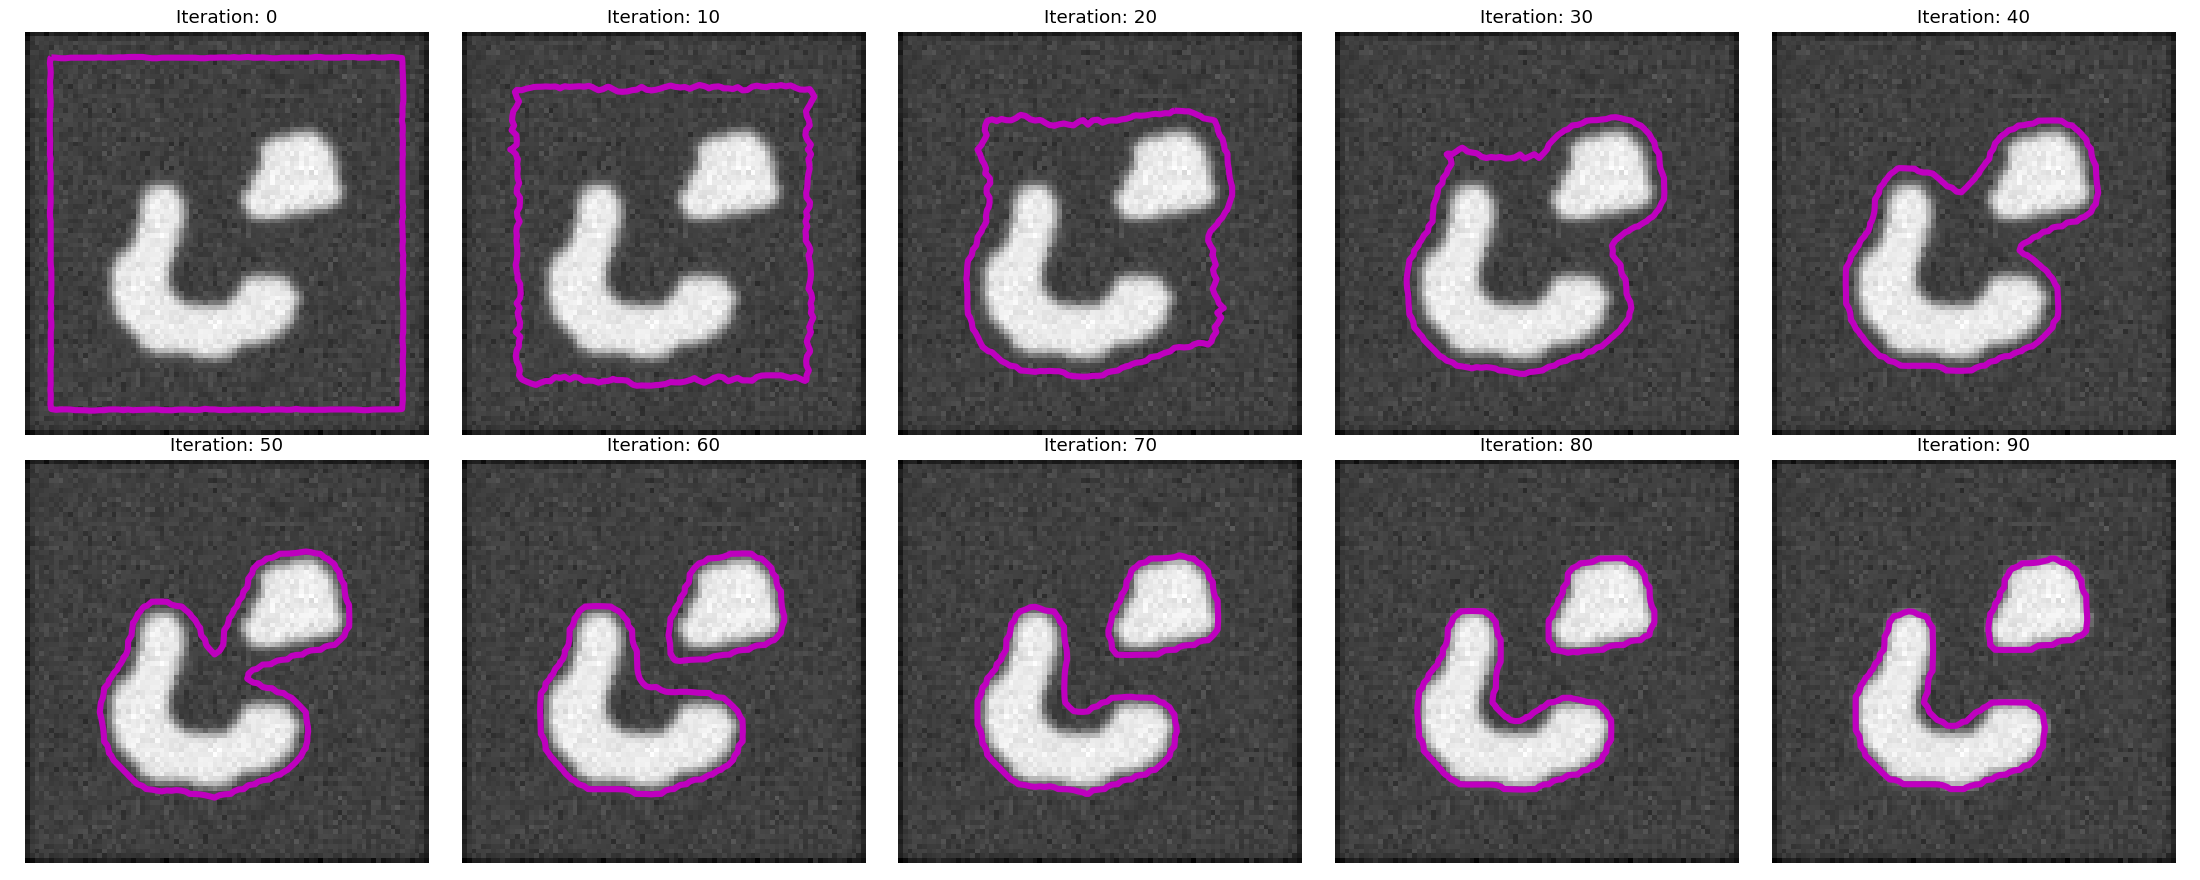

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
axes = axes.flatten()

phi = init_phi(img_smooth)           # Initialize the evolving function
F = force_function(img_smooth)       # Define the force function

# Evolve the level set
for i in range(num_iterations):                     
    
    # Update the evolving function by applying evolution equation
    phi = phi + dt * F * gradient_magnitude(phi)

    if i % display_interval == 0:
        ax = axes[int(i/num_plots)]
        ax.imshow(img, cmap='gray')
        ax.contour(phi, levels=[0], colors='m', linewidths=4)   # Zero-crossing
        ax.set_title(f'Iteration: {i}')
        ax.axis('off')
        
plt.tight_layout()
plt.show()

## Deep Snake for Real-Time Instance Segmentation (April 2020)

Limitation: Recent neural network pixel-wise segmentation methods are limited to only segmenting in the bounding box

<center><img src="figs/related_limitation.jpeg" alt="default"/></center>

## Deep Snake for Real-Time Instance Segmentation (April 2020)

Solution: Use an explicit active contour as the alternative representation
<br>$\rightarrow$ Not limited within a bounding box
<br>$\rightarrow$ Generates a set of vertices around the object siloutte
<br>$\rightarrow$ Has fewer parameters in comparison to the pixel-wise segmentation

<center><img src="figs/related_contour.jpeg" width=500px alt="default"/></center>


## Deep Snake for Real-Time Instance Segmentation (April 2020)

Deep Snake: An extension to the snake active contour model
<br>$\rightarrow$ Instead of using the traditional minimizing the energy function method, employ a neural network as the optimizer
<br>$\rightarrow$ Circular convolution is applied for feature learning on the contour
<br>$\rightarrow$ Returns offsets at each vertex to deform the contour to desired object

<center><img src="figs/related_deepsnake.jpeg" width=1000px alt="default"/></center>


## Deep Snake for Real-Time Instance Segmentation (April 2020)

Initialization of the contour for Deep Snake

<center><img src="figs/related_contour_initialization.jpeg" alt="default"/></center>


## Deep Learning and Level Set Approach for Liver and Tumor Segmentation From CT Scans (August 2020)

Limitation: Localizations of the area of abnormality are not quite refined
<br>$\rightarrow$ Recent state-of-art methods for liver tumor segmentation depends heavily on extensive training data, which may not adapt well to unique characteristics
<br>$\rightarrow$ Yet, tumors vary greatly in terms of shape, size, and texture

<center><img src="figs/liver_ex.jpeg" alt="default"/></center>


## Deep Learning and Level Set Approach for Liver and Tumor Segmentation From CT Scans (August 2020)

Solution: Utilize level set method active contour to match more accurately the boundary of the liver/tumor
<br>$\rightarrow$ Benefit from the local features by applying statistical analysis(region-based active contour)
<br>$\rightarrow$ Depends on the pixel intensities of the interior and exterior regions of the contour

<center><img src="figs/liver_levelset.jpeg" alt="default"/></center>


## Deep Learning and Level Set Approach for Liver and Tumor Segmentation From CT Scans (August 2020)

Framework: Still use state-of-art method for segmentation, and employ level set method to enhance the localization of the contour

<center><img src="figs/liver_pipeline.jpeg" width=1000px alt="default"/></center>


## Deep Learning and Level Set Approach for Liver and Tumor Segmentation From CT Scans (August 2020)

- <span style="color: red;">Ground Truth</span>
- <span style="color: blue;">Liver Segmentation</span>
- <span style="color: green;">Refined Liver Segmentation with Level Set Method</span>

<center><img src="figs/liver_detection.jpeg" width=1000px alt="default"/></center>


## Deep Learning and Level Set Approach for Liver and Tumor Segmentation From CT Scans (August 2020)

- <span style="color: red;">Ground Truth</span>
- <span style="color: blue;">Tumor Segmentation</span>
- <span style="color: green;">Refined Tumor Segmentation with Level Set Method</span>

<center><img src="figs/liver_tumordetection.jpeg" alt="default"/></center>


# References

[1] Erkut, E. (2012). Snakes: Active contour models. Hacettepe University. Retrieved from https://web.cs.hacettepe.edu.tr/~erkut/bil717.s12/w08-snakes.pdf

[2] Galeotti, J. (n.d.). Segmentation with Snakes. Carnegie Mellon University. Retrieved from https://www.cs.cmu.edu/~galeotti/methods_course/Segmentation2-Snakes.pdf

[3] van der Walt, S., et al. (n.d.). Active Contours. Scikit-image. Retrieved from https://scikit-image.org/docs/stable/auto_examples/edges/plot_active_contours.html

[4] Salesin, D. (2009). Intelligent Scissors. University of Washington. Retrieved from https://courses.cs.washington.edu/courses/cse455/09wi/Lects/lect4.pdf

[5] Mortensen, E. N., & Barrett, W. A. (1995). Intelligent Scissors for Image Composition. University of Washington. Retrieved from https://courses.cs.washington.edu/courses/cse576/03sp/readings/mort-sigg95.pdf

[6] Zaidi, S. (n.d.). Intelligent Scissors for Image Composition: An Amateur's Explanation. Medium. Retrieved from https://medium.com/@saniyazaidi14/intelligent-scissors-for-image-composition-an-amateurs-explanation-9b75bd97b65c

[7] Stack Overflow contributor. (2017). Livewire algorithm: Intelligent Scissors step by step. Stack Overflow. Retrieved from https://stackoverflow.com/questions/42815596/livewire-algorithm-intelligent-scissors-step-by-step

[8] Wikipedia contributors. (n.d.). Livewire Segmentation Technique. Wikipedia. Retrieved from https://en.wikipedia.org/wiki/Livewire_Segmentation_Technique

[9] Kristia, A. (2016). Level Set Methods. TechBlog. Retrieved from https://agustinus.kristia.de/techblog/2016/11/05/levelset-method/

[10] Kristia, A. (2016). Level Set Segmentation. TechBlog. Retrieved from https://agustinus.kristia.de/techblog/2016/11/20/levelset-segmentation/

[11] Sethian, J. A. (2006). Level Set Methods. Massachusetts Institute of Technology. Retrieved from https://math.mit.edu/classes/18.086/2006/am57.pdf

[12] Dyer, C. (n.d.). Level Sets. University of Wisconsin. Retrieved from https://pages.cs.wisc.edu/~dyer/cs766/slides/levelsets/levelsets-4up.pdf

[13] Lombaert, H. (n.d.). Level Set Methods and Their Applications in Computer Vision. École Polytechnique de Montréal. Retrieved from https://shape.polymtl.ca/lombaert/levelset/#fig:levelset-square

[14] Hu, Y., et al. (2020). Deep Snake for Real-Time Instance Segmentation. arXiv. Retrieved from https://arxiv.org/pdf/2001.01629

[15] ZJU3DV. (n.d.). Snake. GitHub repository. Retrieved from https://github.com/zju3dv/snake/

[16] YouTube video. (n.d.). An Overview of Image Segmentation Techniques. YouTube. Retrieved from https://youtu.be/ZykJ9nylPNI?si=6iBGkVkDyne8IRp2

# References

Snakes:
- https://web.cs.hacettepe.edu.tr/~erkut/bil717.s12/w08-snakes.pdf
- https://www.cs.cmu.edu/~galeotti/methods_course/Segmentation2-Snakes.pdf
- https://scikit-image.org/docs/stable/auto_examples/edges/plot_active_contours.html

Intelligent Scissors:
- https://courses.cs.washington.edu/courses/cse455/09wi/Lects/lect4.pdf
- https://courses.cs.washington.edu/courses/cse576/03sp/readings/mort-sigg95.pdf
- https://medium.com/@saniyazaidi14/intelligent-scissors-for-image-composition-an-amateurs-explanation-9b75bd97b65c
- https://stackoverflow.com/questions/42815596/livewire-algorithm-intelligent-scissors-step-by-step#:~:text=The%20Intelligent%20Scissors%20algorithm%20uses,mouse%20cursor%20during%20interactive%20segmentation).
- https://en.wikipedia.org/wiki/Livewire_Segmentation_Technique


Level Set Methods:
- https://agustinus.kristia.de/techblog/2016/11/05/levelset-method/
- https://agustinus.kristia.de/techblog/2016/11/20/levelset-segmentation/
- https://math.mit.edu/classes/18.086/2006/am57.pdf
- https://pages.cs.wisc.edu/~dyer/cs766/slides/levelsets/levelsets-4up.pdf
- https://shape.polymtl.ca/lombaert/levelset/#fig:levelset-square

Related Topic:
- https://arxiv.org/pdf/2001.01629
- https://github.com/zju3dv/snake/
- https://youtu.be/ZykJ9nylPNI?si=6iBGkVkDyne8IRp2
- https://aapm.onlinelibrary.wiley.com/doi/full/10.1002/acm2.13003